In [21]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

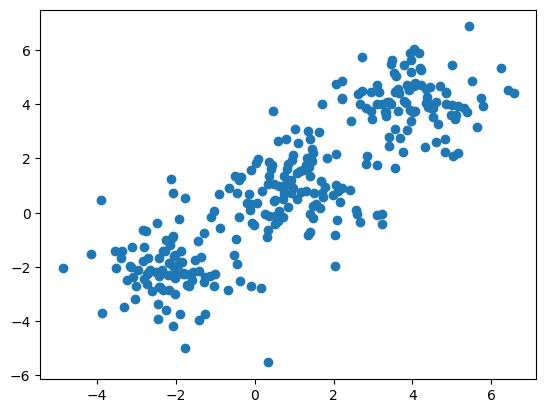

In [22]:
# Generated spherical cluster data
def generate_spherical_data(n_samples, mu1, mu2, mu3, sigma):
    cluster1 = np.random.randn(n_samples, 2) * sigma + mu1
    cluster2 = np.random.randn(n_samples, 2) * sigma + mu2
    cluster3 = np.random.randn(n_samples, 2) * sigma + mu3
    data = np.vstack((cluster1, cluster2, cluster3))
    return data

mu1 = np.array([-2, -2])
mu2 = np.array([1, 1])
mu3 = np.array([4, 4])
sigma = 1.0
data = generate_spherical_data(100, mu1, mu2, mu3, sigma)
plt.scatter(data[:, 0], data[:, 1],)
plt.show()


In [23]:
# Trained using K-means algorithm with GIF generation
def kmeans(data, k, max_iterations=10000):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    prev_centroids = centroids.copy()

    # Create a list to store each image
    images = []

    for iteration in range(max_iterations):
        # Assign each point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        for i in range(k):
            cluster_points = data[labels == i]
            if cluster_points.size > 0:
                centroids[i] = np.mean(cluster_points, axis=0)

        # Plot the current state and save as an image
        plt.scatter(data[:, 0], data[:, 1], c=labels)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red')
        plt.title(f"Iteration {iteration + 1}")

        # Save the current plot as an image
        filename = f"iteration_{iteration + 1}.png"
        plt.savefig(filename)
        images.append(Image.open(filename))
        plt.close()

        # Check for convergence
        if np.all(centroids == prev_centroids):
            break
        prev_centroids = centroids.copy()

    # Combine the images into a GIF
    images[0].save("kmeans_iterations.gif", save_all=True, append_images=images[1:], duration=500, loop=0)

    # # Clean up the temporary image files
    # for filename in images:
    #     os.remove(filename)

    return centroids, labels

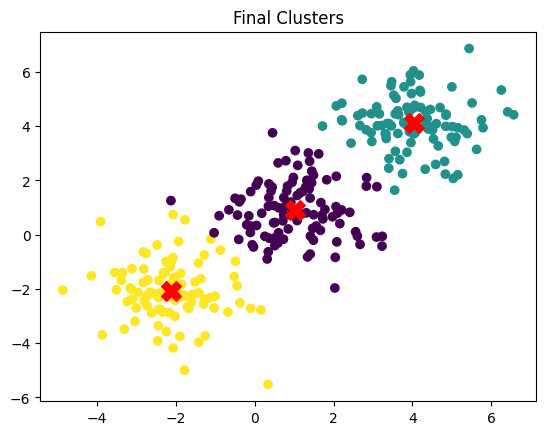

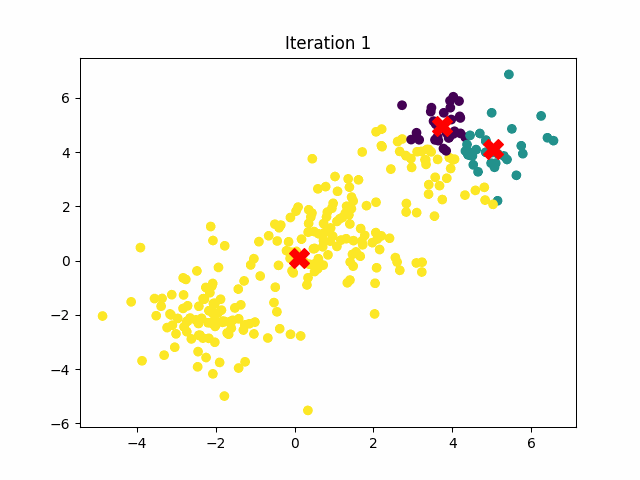

In [24]:
k = 3
final_centroids, final_labels = kmeans(data, k)

# Plot the final clusters
plt.scatter(data[:, 0], data[:, 1], c=final_labels)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=200, c='red')
plt.title("Final Clusters")
filename = f"Final Clusters.png"
plt.savefig(filename)
plt.show()

from IPython.display import Image

# Display the GIF in the notebook
Image(filename="kmeans_iterations.gif")

